## Función de correlación
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as st
from random import random
import matplotlib.pyplot as plt
import math 
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
plt.style.use('classic')
%matplotlib inline

### Generamos dos distribuciones de puntos, una aleatoria 

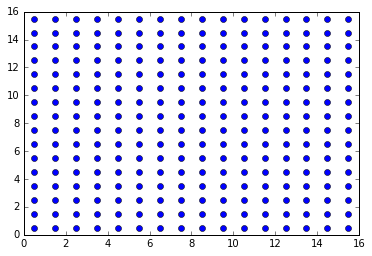

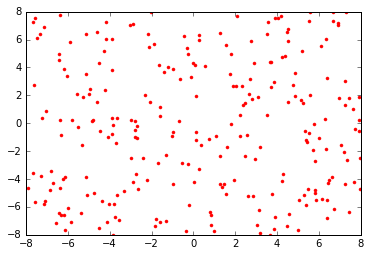

In [2]:
n=2**8
rho=1
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
x=np.zeros(n)
y=np.zeros(n)
radx=[]
rady=[]
k=0
while(k<np.size(x)/2):
    for i in range(int(dim)):
        for j in range(int(dim)):
                x[k]=(d/2.)+d*i
                y[k]=(d/2.)+d*j
                k=k+1
plt.plot(x,y, 'bo')
plt.show()

for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)

plt.plot(radx,rady, 'r.')
plt.show()

### Función de correlación de dos puntos

$\zeta (r)=\frac{DD(r)}{RR(r)}-1$

In [3]:
def cor(x,y,xrand,yrand,dim,t_bins):
    global xf, err
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    drand = []
    gr = np.zeros(t_bins)
    grand = np.zeros(t_bins)
    err = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            r_rand = math.sqrt(((xrand[i]-xrand[j])**2)+(yrand[i]-yrand[j])**2)
            rdist.append(r)
            drand.append(r_rand)
    plt.hist(rdist, bins=bins, edgecolor = 'black',  linewidth=1, color="blue",label = "$DD(r)$", alpha=0.5)
    plt.title("$Histogram$",fontsize = 18)
    plt.xlabel("$Count$",fontsize = 18)
    plt.ylabel("$Frequency$",fontsize = 18)
    plt.legend()
    plt.show()

    plt.hist(drand, bins=bins, edgecolor = 'black',  linewidth=1, color="red",label = "$RR(r)$", alpha=0.5)
    plt.title("$Histogram$",fontsize = 18)
    plt.xlabel("$Count$",fontsize = 18)
    plt.ylabel("$Frequency$",fontsize = 18)
    plt.legend()
    plt.show()
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            r_rand = np.uint32((drand[j])/ran)
            if(r<dmax):
                gr[int(r)]=gr[int(r)]+1
            if(r_rand<dmax):
                grand[int(r_rand)]=grand[int(r_rand)]+1
    for i in range(t_bins):
        if(grand[i]!=0):
            err[i]=(gr[i]/grand[i])-1
    xf=np.linspace(0,dmax,np.size(err))
    plt.plot(xf,err,'bo-')
    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y
    plt.show()

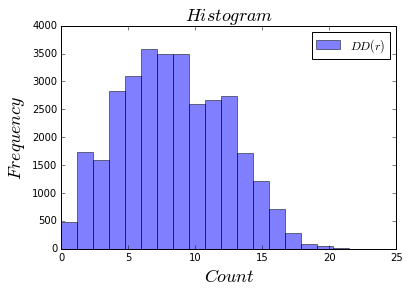

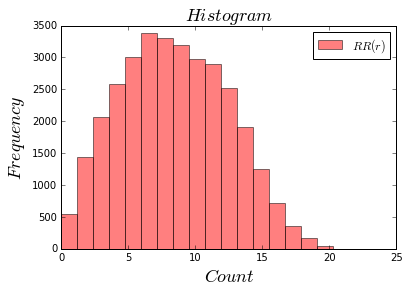

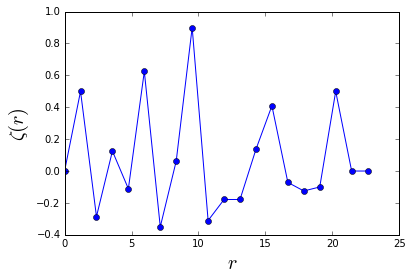

In [4]:
cor(x,y,radx,rady,dim,20)

### Aumentamos el número de bins

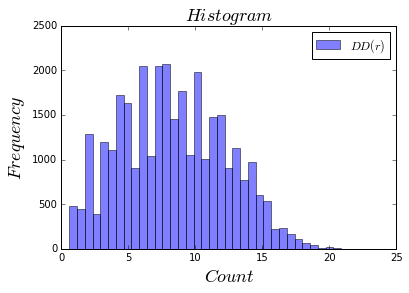

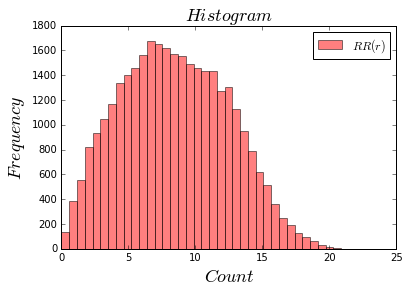

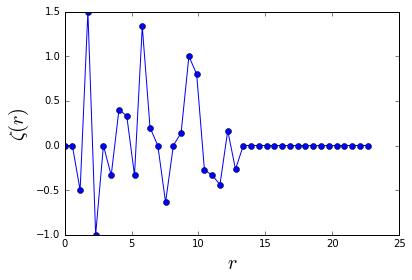

In [6]:
cor(x,y,radx,rady,dim,40)

### Se disminuye el número de bins

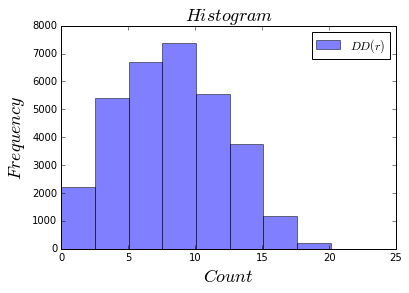

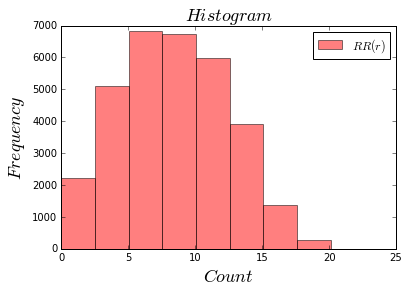

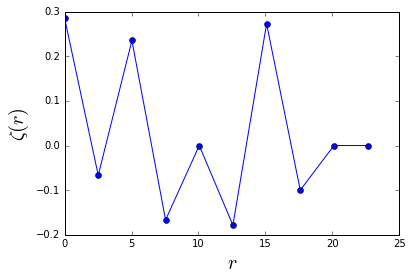

In [7]:
cor(x,y,radx,rady,dim,10)

### Función de correlación para una muestra aleatoria

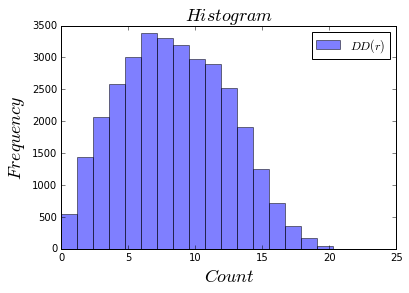

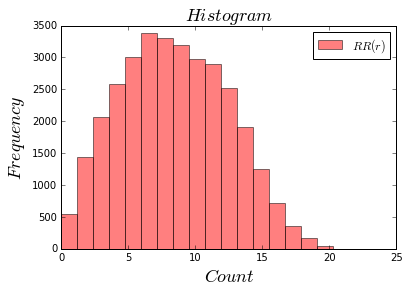

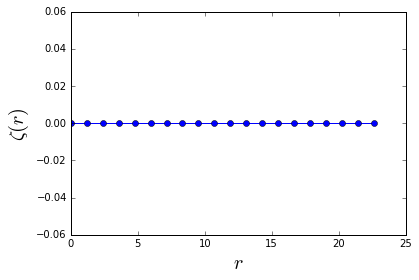

In [5]:
cor(radx,rady,radx,rady,dim,20)